In [1]:
import pytesseract
from PIL import Image
import PIL
from PIL.ImageGrab import grab as screenshot
import pyautogui
import os

import tempfile
import numpy as np

In [12]:
tempdir = "ngu"
os.makedirs(tempdir, exist_ok=True)

In [13]:
def get_wire():
    bbox = 53, 754, 237, 774
    return screenshot(bbox)

In [14]:
import win32api, math
SCREEN_X = win32api.GetSystemMetrics(78)
SCREEN_Y = win32api.GetSystemMetrics(79)

def norm(x, y):
    return math.ceil(x / (SCREEN_X) * 65535), math.ceil(y / (SCREEN_Y) * 65536)

def denorm(x,y):
    return math.floor((x / 65535) * SCREEN_X), math.floor((y / 65536) * SCREEN_Y)

def get_pos(normalize=True):
    x, y = win32api.GetCursorPos()
    if normalize:
        x, y = norm(x, y)
    return x,y

def right_click_down():
    return win32api.GetKeyState(0x02) & 0x8000

In [15]:
import contextlib
@contextlib.contextmanager
def tmpf(suff):
    with tempfile.NamedTemporaryFile("wb+", dir=tempdir, suffix=suff, delete=False) as f:
        try:
            yield f
        except:
            raise
def tmpn(suffix):
    return tempfile.NamedTemporaryFile("wb+", dir=tempdir, suffix=suffix, delete=False).name

In [16]:
import tkinter as tk, tkinter.ttk as ttk
def coord_box():
    root = tk.Tk()
    f = tk.Frame(root)
    sv = tk.StringVar()
    sv2 = tk.StringVar()
    label = ttk.Label(f, textvariable=sv)
    space = ttk.Label(f, textvariable=sv2)
    sv.set("(0, 0)")
    sv2.set(" "*12)
    SF = False
    def stop():
        nonlocal SF
        SF = True
        root.destroy()
        
    exit = ttk.Button(f, text="Stop", command=stop)
    label.grid(row=0, column=0)
    space.grid(row=0, column=1)
    exit.grid(row=0, column=2)
    f.grid()
    
    X = 0
    Y = 0
    RCD = False
    def poll():
        nonlocal sv, SF, RCD, X, Y
        if SF:
            return
        x,y = get_pos(False)
        sv.set("x=%d y=%d"%(x,y))
        if right_click_down():
            if not RCD:
                RCD = True
                X, Y = get_pos(False)
            
            sv2.set("%12s" % ("w=%d h=%d"%(abs(X-x), abs(Y-y))))
        else:
            if RCD:
                print("bbox = (%d, %d, %d, %d)"%(min(x, X), min(y, Y), max(X,x), max(Y,y)))
            RCD = False
        root.after(100, poll)
    root.after(1, poll)
    
    root.mainloop()

In [132]:
coord_box()

bbox = (1010, 483, 1072, 503)


In [33]:
bbox_tm_level = (1034+5, 459, 1058, 478)
bbox_gold = (208, 558, 282, 570)
bbox_dscissors_lvl = (897, 517, 928, 538)
bbox = (892, 459, 954, 480)

In [170]:
def read_num(img):
    # the char whitelist doesn't work in tesseract 4.0
    # so need to manually fix the string 
    # convert e.g. s -> 5, S -> 5, and so on
    s = pytesseract.image_to_string(img, config="--psm 7 -l eng")
#     out = []
#     for c in s:
#         if c in "sS":
#             c = "5"
#         elif c in "oO":
#             c = "0"
#         out.append(c)
    return s #"".join(out)

In [148]:
def dist(r,g,b, bg):
    return math.sqrt((r-bg[0])**2 + (g-bg[1])**2 + (b-bg[2])**2)

In [139]:
bbox1 = (1007, 510, 1078, 563)
bbox2 = (182, 453, 299, 552)
bbox = (1010, 483, 1072, 503)
img = screenshot(bbox)
img2 = np.asarray(img, dtype=np.uint8)
background = img2[0,0]

dist = np.sqrt(np.sum((img2-background)**2, axis=2))
black = (dist < 5) * np.uint8(255)
img_out = PIL.Image.fromarray((black))
s = pytesseract.image_to_string(img_out, config="--psm 8")
print(s)
img_out

659,988


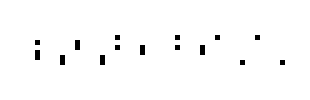

In [162]:
import numpy as np
img = screenshot(bbox)
img2 = np.asarray(img)
img3 = np.empty_like(img2, dtype=np.uint8)
a,d,c = img2.shape
bg = img2[0,0]
f = open("test.txt", 'w')
for i in range(a):
    for j in range(d):
        r,g,b = img2[i,j]
        #print(dist(r,g,b))
        #st = dist(r,g,b, bg)
        #print(st)
        if (r,g,b) != (0,0,0):
            r,g,b = 255, 255, 255
#         if st < 110:
#             r,g,b = 255, 255, 255
#             st = 0
#         else:
#             r,g,b = 0,0,0
        img3[i,j] = r,g,b
#         st = int(st)
#         if st == 0:
#             st = "   "
#         else:
#             st = "%3d"%st
#         print(st, end=" ", file=f)
        if j == d-1:
            print(file=f)
f.close()
img4 = PIL.Image.fromarray(img3)
s=5
img4.convert("1").resize((img4.width*s, img4.height*s))

In [175]:
s = 5
bbox = (207, 551, 281, 564)
img = screenshot(bbox)
big=img.resize((img.width*s, img.height*s))
read_num(img)

'8.165E+009'

In [174]:
coord_box()

bbox = (207, 551, 281, 564)


In [215]:
import cv2
cv2.imshow("snip",np.asarray(img4))

In [125]:
img2 = img.convert("L")
import numpy as np
img3 = np.asarray(img2, dtype=np.uint8)
img4 = (img3 < 199)*255

In [140]:
img3 = img2.point(lambda x: 255 if x > 190 else 0, mode='1')
pytesseract.image_to_string(img3, config="--psm 8")

'5'

In [20]:
import win32gui

hwnd = win32gui.FindWindow(None, 'Play NGU IDLE, a free online game on Kongregate - Google Chrome')
bbox = win32gui.GetWindowRect(hwnd)
img = screenshot((0, 0, bbox[2], bbox[3]))
bbox

(-8, -8, 1608, 868)

In [ ]:
import cv2, numpy, numpy as np
opencvImage = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2GRAY)

In [ ]:
img = opencvImage
h, w = img.shape[:2]
kernel = np.ones((15,15),np.uint8)

e = cv2.erode(img,kernel,iterations = 2)  
d = cv2.dilate(e,kernel,iterations = 1)
ret, th = cv2.threshold(d, 1, 255, cv2.THRESH_BINARY)

mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(th, mask, (200,200), 255); # position = (200,200)
out = cv2.bitwise_not(th)
out= cv2.dilate(out,kernel,iterations = 3)
_, cnt, h = cv2.findContours(out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(cnt)):
            area = cv2.contourArea(cnt[i])
            if(area>100 and area<10000000):
                  mask = np.zeros_like(img)
                  cv2.drawContours(mask, cnt, i, 255, -1)
                  x,y,w,h = cv2.boundingRect(cnt[i])
                  crop= img[y:h+y,x:w+x]
                  cv2.imshow("snip",crop )
                  if(cv2.waitKey(0))==27:break

cv2.destroyAllWindows()

In [4]:
import requests, gzip, os, zlib

In [16]:
with open("Kong.asm.memory.unityweb", 'rb') as f:
    b = f.read()
b2 = zlib.decompress(b)

error: Error -3 while decompressing data: unknown compression method

In [31]:
rsp = sess.get("https://game287709.konggames.com/gamez/0028/7709/live/Build/Kong.data.unityweb")
content = rsp.content
with open("test2.gz", 'wb') as f:
    f.write(content)
content = gzip.decompress(content)

In [25]:
with open("test.bin", 'wb') as f:
    f.write(content)

In [6]:
import requests, os, gzip
os.chdir("C:\\users\\administrator\\documents")

sess=  requests.Session()
base = "https://game287709.konggames.com/gamez/0028/7709/live/Build/"
files = [
    "Kong.asm.code.unityweb",
    "Kong.asm.memory.unityweb",
    "Kong.asm.framework.unityweb",
    "Kong.data.unityweb",
#     "UnityLoader.js"
]
for fp in files:
    url = base + fp
    print("Requesting: %s"%url)
    rsp = sess.get(url)
    rsp.raise_for_status()
    b = rsp.content
    b2 = gzip.decompress(b)
    with open(fp, 'wb') as f:
        f.write(b2)

Requesting: https://game287709.konggames.com/gamez/0028/7709/live/Build/Kong.asm.code.unityweb
Requesting: https://game287709.konggames.com/gamez/0028/7709/live/Build/Kong.asm.memory.unityweb
Requesting: https://game287709.konggames.com/gamez/0028/7709/live/Build/Kong.asm.framework.unityweb
Requesting: https://game287709.konggames.com/gamez/0028/7709/live/Build/Kong.data.unityweb


In [17]:
s = jsbeautifier.beautify_file(files[2])
with open(files[2], 'w') as f:
    f.write(s)

In [12]:
jsbeautifier.beautify_file??

In [58]:
import unitypack, os
import unitypack.utils
os.chdir("C:\\users\\administrator\\documents")
with open("Kong.data.unityweb", 'rb') as f:
    text = f.read()
    f.seek(0,0)
    buf = unitypack.utils.BinaryReader(f, endian="<")
    pos = 0
    header = b"UnityWebData1.0\0"
    sig = buf.read(len(header))
    assert sig
    #assert sig.decode("utf-16") == header, (sig.decode("utf-16"), header)
    pos += len(sig)
    #print(sig, pos, text[:pos])
    flen = buf.read_uint()
    pos += 4
    #print(sig, pos, flen)
    while pos < flen:
        s = buf.read_uint(); pos += 4
        d = buf.read_uint(); pos += 4
        #print(pos); break
        l = buf.read_uint(); pos += 4
        f = buf.read(l);
        pos += len(f)
        u = 0
        print(f)
        f = f.replace(b"/", b"_")
        with open(f.decode(), 'wb') as fd:
            fd.write(text[s:s+d])
        
            
            
            
            #print(len(text[s:s+d]))
        

b'Resources/unity_default_resources'
b'Managed/mono/2.0/machine.config'
b'Il2CppData/Metadata/global-metadata.dat'
b'data.unity3d'
b'methods_pointedto_by_uievents.xml'
b'preserved_derived_types.xml'
b'resources.resource'


In [ ]:
f = b'Managed/mono/2.0/machine.config'
c = f.index(b"/", 0) + 1
u = c


In [60]:
text[len(header):len(header)+4]

b')\x01\x00\x00'

In [62]:
struct.unpack(">I",b')\x01\x00\x00')

(687931392,)

In [39]:
text[26:70]

b'\x0b\x00!\x00\x00\x00Resources/unity_default_resourcesY9\x0b\x00\xe9'

In [40]:
expected = "Resources/unity_default_resources"
len(expected)

33

In [48]:
s,d

(687931392, 808979200)

In [46]:
b = text[28:32]
b

b'!\x00\x00\x00'

In [45]:
b"!"[0]

33

In [47]:
struct.unpack("<I",b)

(33,)

In [51]:
flen

687931392

In [23]:
import struct
struct.unpack("<I", text[len(header):len(header)+4])

(297,)

In [49]:
import struct
[struct.pack(">c", b).decode() for b in sig]

error: char format requires a bytes object of length 1

In [68]:
struct.pack(">p", b"UnityWebData1.0").decode("utf-16")

UnicodeDecodeError: 'utf-16-le' codec can't decode byte 0x00 in position 0: truncated data

In [69]:
[b for b in sig]

[85, 110, 105, 116, 121, 87, 101, 98, 68, 97, 116, 97, 49, 46, 48, 0]

In [27]:
d_loc = len(sig)+4+4+4
text[d_loc:d_loc+4]

b'!\x00\x00\x00'

In [20]:
text[pos:pos+l]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [21]:
pos, l

(32, 553648128)

In [12]:
unitypack.utils.BinaryReader.read_int??

In [61]:
import os
import requests, os, gzip
os.chdir("C:\\users\\administrator\\documents\\test")
import unitypack
types = set()
with open("out.unity3d", 'rb') as f:
    stuff = unitypack.load(f)
    for asset in stuff.assets:
        for id, object in asset.objects.items():
            # Let's say we only want TextAsset objects
            types.add(object.type)
            if object.type == "MonoManager":
                print(object.read())
#             if object.type == "MonoScript":
#                 # We avoid reading the data, unless it's a TextAsset
#                 data = object.read()
#                 print(data)


OrderedDict([('m_Scripts', [ObjectPointer(file_id=1, path_id=11998), ObjectPointer(file_id=1, path_id=12001), ObjectPointer(file_id=3, path_id=225), ObjectPointer(file_id=3, path_id=184), ObjectPointer(file_id=3, path_id=201), ObjectPointer(file_id=3, path_id=144), ObjectPointer(file_id=3, path_id=86), ObjectPointer(file_id=3, path_id=113), ObjectPointer(file_id=3, path_id=75), ObjectPointer(file_id=3, path_id=216), ObjectPointer(file_id=3, path_id=183), ObjectPointer(file_id=3, path_id=150), ObjectPointer(file_id=3, path_id=283), ObjectPointer(file_id=3, path_id=209), ObjectPointer(file_id=3, path_id=196), ObjectPointer(file_id=3, path_id=329), ObjectPointer(file_id=3, path_id=204), ObjectPointer(file_id=3, path_id=82), ObjectPointer(file_id=3, path_id=214), ObjectPointer(file_id=3, path_id=115), ObjectPointer(file_id=3, path_id=176), ObjectPointer(file_id=3, path_id=96), ObjectPointer(file_id=3, path_id=239), ObjectPointer(file_id=3, path_id=307), ObjectPointer(file_id=3, path_id=291

KeyError: -9

In [60]:
types

{'<Unknown #301>',
 '<Unknown #310>',
 'AudioListener',
 'AudioManager',
 'BuildSettings',
 'Camera',
 'Canvas',
 'CanvasRenderer',
 'DelayedCallManager',
 'FlareLayer',
 'Font',
 'GUILayer',
 'GameObject',
 'GraphicsSettings',
 'InputManager',
 'LightmapSettings',
 'Material',
 'MonoManager',
 'MonoScript',
 'NavMeshAreas',
 'Physics2DSettings',
 'PhysicsManager',
 'PlayerSettings',
 'PreloadData',
 'QualitySettings',
 'RectTransform',
 'RenderSettings',
 'ResourceManager',
 'RuntimeInitializeOnLoadManager',
 'ScriptMapper',
 'Shader',
 'Sprite',
 'TagManager',
 'Texture2D',
 'TimeManager',
 'Transform'}

In [63]:
asset.

{}